In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

In [4]:
# Linear regression model
model = nn.Linear(input_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [5]:
# Train the model 
for epoch in range(num_epochs):
    # Convert numpy array to torch tensors
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)
    
    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 5 == 0:
        print('Epoch: [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch: [5/60], Loss: 24.4620
Epoch: [10/60], Loss: 10.1375
Epoch: [15/60], Loss: 4.3341
Epoch: [20/60], Loss: 1.9827
Epoch: [25/60], Loss: 1.0298
Epoch: [30/60], Loss: 0.6435
Epoch: [35/60], Loss: 0.4866
Epoch: [40/60], Loss: 0.4228
Epoch: [45/60], Loss: 0.3966
Epoch: [50/60], Loss: 0.3856
Epoch: [55/60], Loss: 0.3809
Epoch: [60/60], Loss: 0.3787


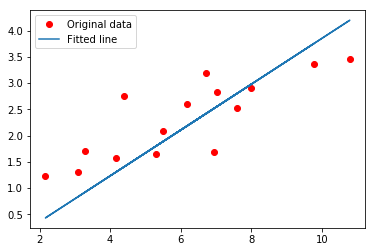

In [6]:
# Plot the graph
predicted = model(inputs).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

In [7]:
# Save the model checkpoint
torch.save(model.state_dict(), './checkpoint/linear_regression.ckpt')